# Minsait Land Classification

---

## Descripción del problema

Este es un reto de multiclasificación cuya principal dificultad es que **las clases están muy desbalanceadas**. Tenlo en cuenta ya que nuestro dataset de validación no lo estará tanto.

**Variables**

Los ficheros contienen un total 56 variables: las 6 primeras de ellas relativas a la identificación de los registros y las 8 últimas variables son distintas referencias geométricas y relativas al entorno (geometría del edificio, métricas geométricas generadas automáticamente -GEOM-, metros cuadrados, año construcción y nº de plantas de los edificios del entorno).

Las imágenes satelitales se han tratado y se ha extraído información de 4 canales (R, G, B y NIR), correspondientes a las bandas de color rojo, verde y azul, y el infrarrojo cercano. El valor mostrado corresponde a la intensidad por deciles en cada imagen. Estas variables empiezan con la letra “Q”.

El fichero "Modelar_UH2020.txt" tiene, adicionalmente como última variable, la clase a predecir.

La referencia catastral está ofuscada por lo que no es consultable, solo es válida como identificador de registro.  

La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). 

El principal grupo de variables es información sobre los canales de color R-G-B e infrarrojo de las imágenes tomadas por satélite. Hay 11 variables extraídas de cada uno de estos canales, que representan el valor o densidad en cada decil.  

Así, la variable Q_R_4_0_0 representa el valor para el canal Red en el decil 0, la variable Q_G_3_0_8 representa el valor para el canal Green del decil 8 etc. La identificación “Q_NIR…” representa el canal en infrarrojo. 

A continuación, hay 1 variable de área y 4 variables que condensan información de tipo geométrico sobre la parcela/registro.  

El MAXBUILDINGFLOOR se refiere a la altura máxima de los registros colindantes, no al propio registro. El año de construcción también se refiere al entorno. 

Por último, se presenta una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). 


**Ámbito geográfico y temporal**

El ámbito geográfico de las imágenes es una zona concreta del municipio Madrid. Una misma referencia geográfica puede tener datos tomados en distintos momentos, siendo una referencia (ID) distinta a todos los efectos.

**Los datasets con formato txt tienen como estructura**:

Nombres de campo: Incluidos en la cabecera.
Separador: "|".
Codificación: UTF-8.

**Dataset respuesta**

Se denominará “Equipo_UH2020.txt” donde Equipo será el nombre del equipo con el que te has inscrito y constará de dos columnas que corresponden a la variable “ID” (identificación de la referencia en “Estimar_UH2020.txt”) y la variable “CLASE”, que la predicción del tipo de terreno estimado por tu modelo.

---

## Importar paquetes y dependencias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# seguir importando dependencias necesarias

---
## Carga de los datos a modelar

In [2]:
df_minsait = pd.read_csv('data/Modelar_UH2020.txt', sep="|", index_col='ID', encoding='utf-8')

---
## Análisis exploratorio de los datos

In [3]:
print("Tamaño del conjunto de datos:  %d" % df_minsait.shape[0])
print("Número de variables: %d" % df_minsait.shape[1])
if df_minsait.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_minsait.head()

Tamaño del conjunto de datos:  103230
Número de variables: 55
El índice es único.


X          Y  Q_R_4_0_0   Q_R_4_0_1   Q_R_4_0_2  \
ID                                                                           
35984B9C3E7CD9A1  2207357872  165920300   0.000000  443.001300  616.001697   
F9D04BF6D037F8FB  2189757160  165463267   0.000059  443.899011  627.999060   
B89D5711AFF8C423  2240147335  165690752   0.000000  353.502274  523.003601   
1C3478AC1522E7E4  2227146459  165934099   0.000000  268.000613  376.999609   
4D12AA5009064345  2212350459  165681791   0.000000  318.997910  492.003845   

                   Q_R_4_0_3   Q_R_4_0_4    Q_R_4_0_5    Q_R_4_0_6  \
ID                                                                   
35984B9C3E7CD9A1  746.998401  872.996472  1009.000946  1159.002319   
F9D04BF6D037F8FB  770.001611  904.999988  1032.998474  1165.001636   
B89D5711AFF8C423  644.001831  760.997131   876.999634  1006.997498   
1C3478AC1522E7E4  478.003784  575.001233   683.997742   809.005994   
4D12AA5009064345  632.999634  757.002197   882.999908  1019.008911   

                    Q_R_4_0_7  ...   Q_NIR_8_1_0         AREA   GEOM_R1  \
ID                             ...                                        
35984B9C3E7CD9A1  1342.002466  ...  10951.926645   144.426900  0.557237   
F9D04BF6D037F8FB  1316.000110  ...   7048.367637    38.342550  0.709884   
B89D5711AFF8C423  1168.995544  ...   7013.073271   108.794384  0.517702   
1C3478AC1522E7E4   955.002960  ...   6216.880538   155.224455  0.450871   
4D12AA5009064345  1175.993103  ...   7092.767616  1789.873366  0.458819   

                   GEOM_R2   GEOM_R3   GEOM_R4  CONTRUCTIONYEAR  \
ID                                                                
35984B9C3E7CD9A1  0.067249  0.057372  0.853127             2002   
F9D04BF6D037F8FB  0.125156  0.147929  1.181953             1949   
B89D5711AFF8C423  0.058268  0.081666  1.401552             1986   
1C3478AC1522E7E4  0.053591  0.054201  1.011382             1999   
4D12AA5009064345  0.012858  0.019936  1.550478             1966   

                  MAXBUILDINGFLOOR  CADASTRALQUALITYID        CLASE  
ID                                                                   
35984B9C3E7CD9A1               0.0                   2  RESIDENTIAL  
F9D04BF6D037F8FB               1.0                   8  RESIDENTIAL  
B89D5711AFF8C423               1.0                   5  RESIDENTIAL  
1C3478AC1522E7E4               1.0                   2  RESIDENTIAL  
4D12AA5009064345               8.0                   6  RESIDENTIAL  

[5 rows x 55 columns]

In [5]:
#Visualizamos las columnas completas del dataset
df_minsait.columns

Index(['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

https://mappinggis.com/2019/05/combinaciones-de-bandas-en-imagenes-de-satelite-landsat-y-sentinel/

https://sentinel.esa.int/web/sentinel/missions/sentinel-2/instrument-payload/resolution-and-swath

In [6]:
df_minsait.dtypes
#Observamos que todas las variables son numéricas salvo la clase objetivo y la variable CADASTRALQUALITYID, la cual habrá que investigar detenidamente

X                       int64
Y                       int64
Q_R_4_0_0             float64
Q_R_4_0_1             float64
Q_R_4_0_2             float64
Q_R_4_0_3             float64
Q_R_4_0_4             float64
Q_R_4_0_5             float64
Q_R_4_0_6             float64
Q_R_4_0_7             float64
Q_R_4_0_8             float64
Q_R_4_0_9             float64
Q_R_4_1_0             float64
Q_G_3_0_0             float64
Q_G_3_0_1             float64
Q_G_3_0_2             float64
Q_G_3_0_3             float64
Q_G_3_0_4             float64
Q_G_3_0_5             float64
Q_G_3_0_6             float64
Q_G_3_0_7             float64
Q_G_3_0_8             float64
Q_G_3_0_9             float64
Q_G_3_1_0             float64
Q_B_2_0_0             float64
Q_B_2_0_1             float64
Q_B_2_0_2             float64
Q_B_2_0_3             float64
Q_B_2_0_4             float64
Q_B_2_0_5             float64
Q_B_2_0_6             float64
Q_B_2_0_7             float64
Q_B_2_0_8             float64
Q_B_2_0_9 

In [7]:
df_minsait[:-2].describe() #Obtenemos la información relativa a todas las variables numéricas

X             Y     Q_R_4_0_0      Q_R_4_0_1      Q_R_4_0_2  \
count  1.032280e+05  1.032280e+05  1.032280e+05  103228.000000  103228.000000   
mean   2.208858e+09  1.655955e+08  4.578893e-05     382.633818     548.659273   
std    2.751700e+07  2.040211e+05  3.168792e-03      99.471737     121.440953   
min    2.120751e+09  1.650957e+08  0.000000e+00     151.000375     184.999420   
25%    2.194235e+09  1.654515e+08  0.000000e+00     316.997635     492.003845   
50%    2.205984e+09  1.655907e+08  0.000000e+00     385.000995     562.997583   
75%    2.224105e+09  1.657138e+08  5.786675e-07     445.002853     627.001038   
max    2.287300e+09  1.665046e+08  1.016050e+00     833.999402    1016.000732   

           Q_R_4_0_3      Q_R_4_0_4      Q_R_4_0_5      Q_R_4_0_6  \
count  103228.000000  103228.000000  103228.000000  103228.000000   
mean      684.016954     811.054449     939.978563    1080.128079   
std       137.764854     153.487849     169.547975     186.424119   
min       214.000473     239.999503     269.999451     310.999493   
25%       632.999634     753.999597     875.008087    1006.997498   
50%       698.003998     833.996582     969.999817    1115.001489   
75%       770.001611     904.999988    1042.505188    1200.006226   
max      1200.003003    1377.999927    1570.504517    1806.002686   

           Q_R_4_0_7  ...    Q_NIR_8_0_8    Q_NIR_8_0_9    Q_NIR_8_1_0  \
count  103228.000000  ...  103228.000000  103228.000000  103228.000000   
mean     1242.841786  ...    2328.361629    2738.620983    7748.321031   
std       206.995766  ...     295.853714     365.814683    2795.795464   
min       382.999844  ...    1861.006226    2172.992676    4085.049076   
25%      1173.999329  ...    2126.002441    2478.998193    6051.309064   
50%      1268.997705  ...    2313.999268    2688.000000    6798.207198   
75%      1348.996033  ...    2491.004199    2940.996704    8033.479864   
max      2175.694824  ...    3750.997559    4614.998535   15848.608811   

                AREA        GEOM_R1        GEOM_R2        GEOM_R3  \
count  103228.000000  103228.000000  103228.000000  103228.000000   
mean      441.127408       0.563343       0.062482       0.061855   
std      1869.722994       0.174142       0.042849       0.042296   
min         0.038770       0.000626       0.000679       0.000770   
25%        97.475153       0.455184       0.038255       0.038153   
50%       171.554907       0.536336       0.055802       0.055036   
75%       343.552029       0.674724       0.078478       0.078064   
max    238058.952253       1.000000       1.785714       2.631579   

             GEOM_R4  CONTRUCTIONYEAR  MAXBUILDINGFLOOR  
count  103228.000000    103228.000000     103208.000000  
mean        1.074329      1972.552418          3.766733  
std         0.541158        22.336200          2.944912  
min         0.015157      1820.000000          0.000000  
25%         0.801357      1960.000000          1.000000  
50%         0.997175      1972.000000          4.000000  
75%         1.223450      1989.000000          5.000000  
max        68.812431      2017.000000         25.000000  

[8 rows x 53 columns]

In [75]:
#Comprobamos que no haya valores perdidos en el conjunto de datos
df_minsait.isna().sum()[df_minsait.isna().sum()>0]

MAXBUILDINGFLOOR      20
CADASTRALQUALITYID    20
dtype: int64

Observamos que las variables **MAXBUILDINGFLOOR** y **CADASTRALQUALITYID** presentan valores perdidos y será necesario decidir si se eliminan, se imputan o qué se hace con ellos

Ahora vamos a analizar la variable clase, para comprobar si se encuentra desbalanceada y cuales son las distintas etiquetas a predecir

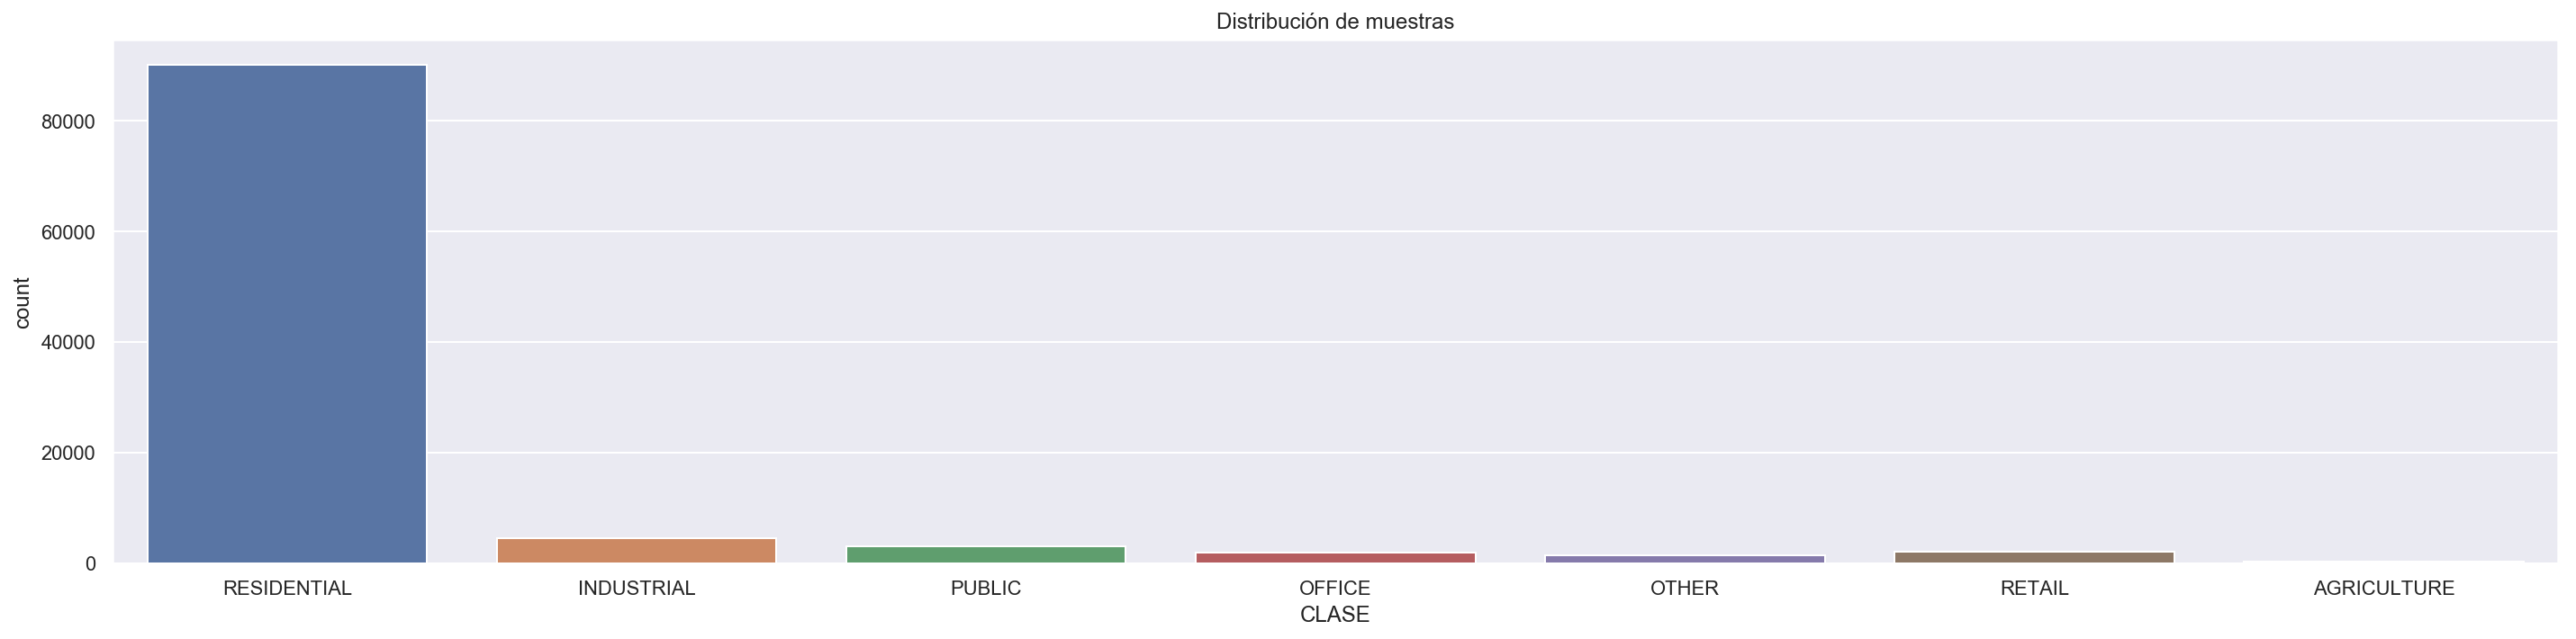

Numero de variables del train: 55
Numero de instancias del train: 103230
Clase a predecir: ['AGRICULTURE' 'INDUSTRIAL' 'OFFICE' 'OTHER' 'PUBLIC' 'RESIDENTIAL'
 'RETAIL']


In [77]:
plt.figure(figsize=(20,5))
sns.countplot(x='CLASE', data=df_minsait)
plt.title('Distribución de muestras')
plt.tight_layout()
plt.show()
print('Numero de variables del train: {}'.format(df_minsait.shape[1]))
print('Numero de instancias del train: {}'.format(df_minsait.shape[0]))
print('Clase a predecir: {}'.format(np.sort(df_minsait['CLASE'].unique())))

In [8]:
# Mostramos los registros asociados a cada una de las clases a predecir y observamos que la variable se encuentra muy desbalanceada
df_minsait['CLASE'].value_counts()

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64

A continuación vamos a analizar las variables que presentan valores perdidos, así como aquellas que son de tipo objeto, para ver si se transforma a numérica o no.

**MAXBUILDINGFLOOR** se refiere a la altura máxima de los registros colindantes, no al propio registro

In [79]:
np.sort(df_minsait.MAXBUILDINGFLOOR.unique())b

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       nan])

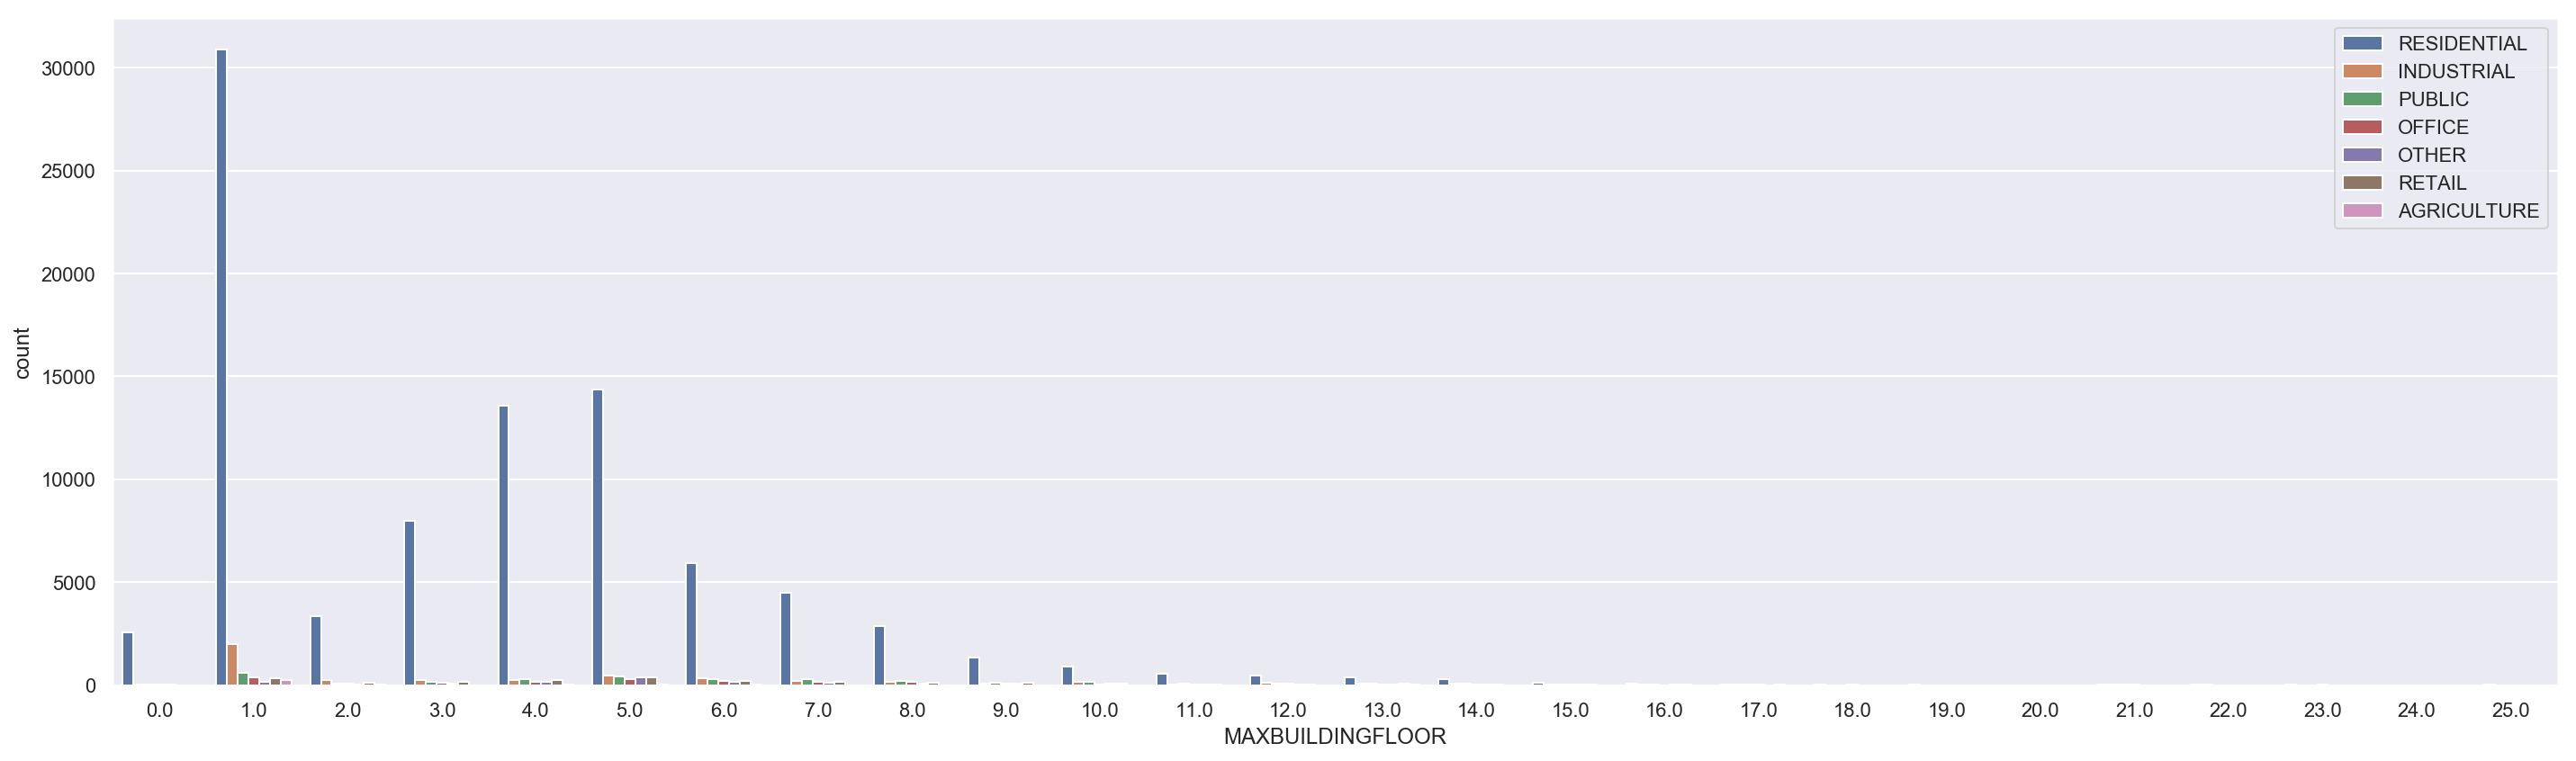

In [87]:
plt.figure(figsize=(20,6))
sns.countplot(x='MAXBUILDINGFLOOR', data=df_minsait, hue='CLASE')
plt.tight_layout()
plt.legend(loc=1);

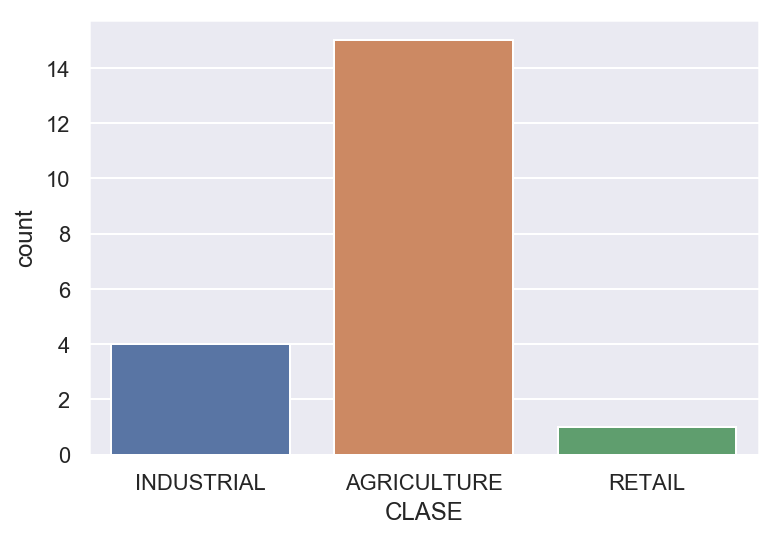

In [89]:
#Información relativa al valor perdido con respecto a la variable MAXBUILDINGFLOOR
sns.countplot(x='CLASE', data=df_minsait[df_minsait.MAXBUILDINGFLOOR.isna()]);

**CADASTRALQUALITYID** es una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). **Va ser necesario establecerle un orden**

In [81]:
df_minsait.CADASTRALQUALITYID.unique()

array(['2', '8', '5', '6', '4', '7', '3', 'C', '1', '9', 'B', 'A', nan],
      dtype=object)

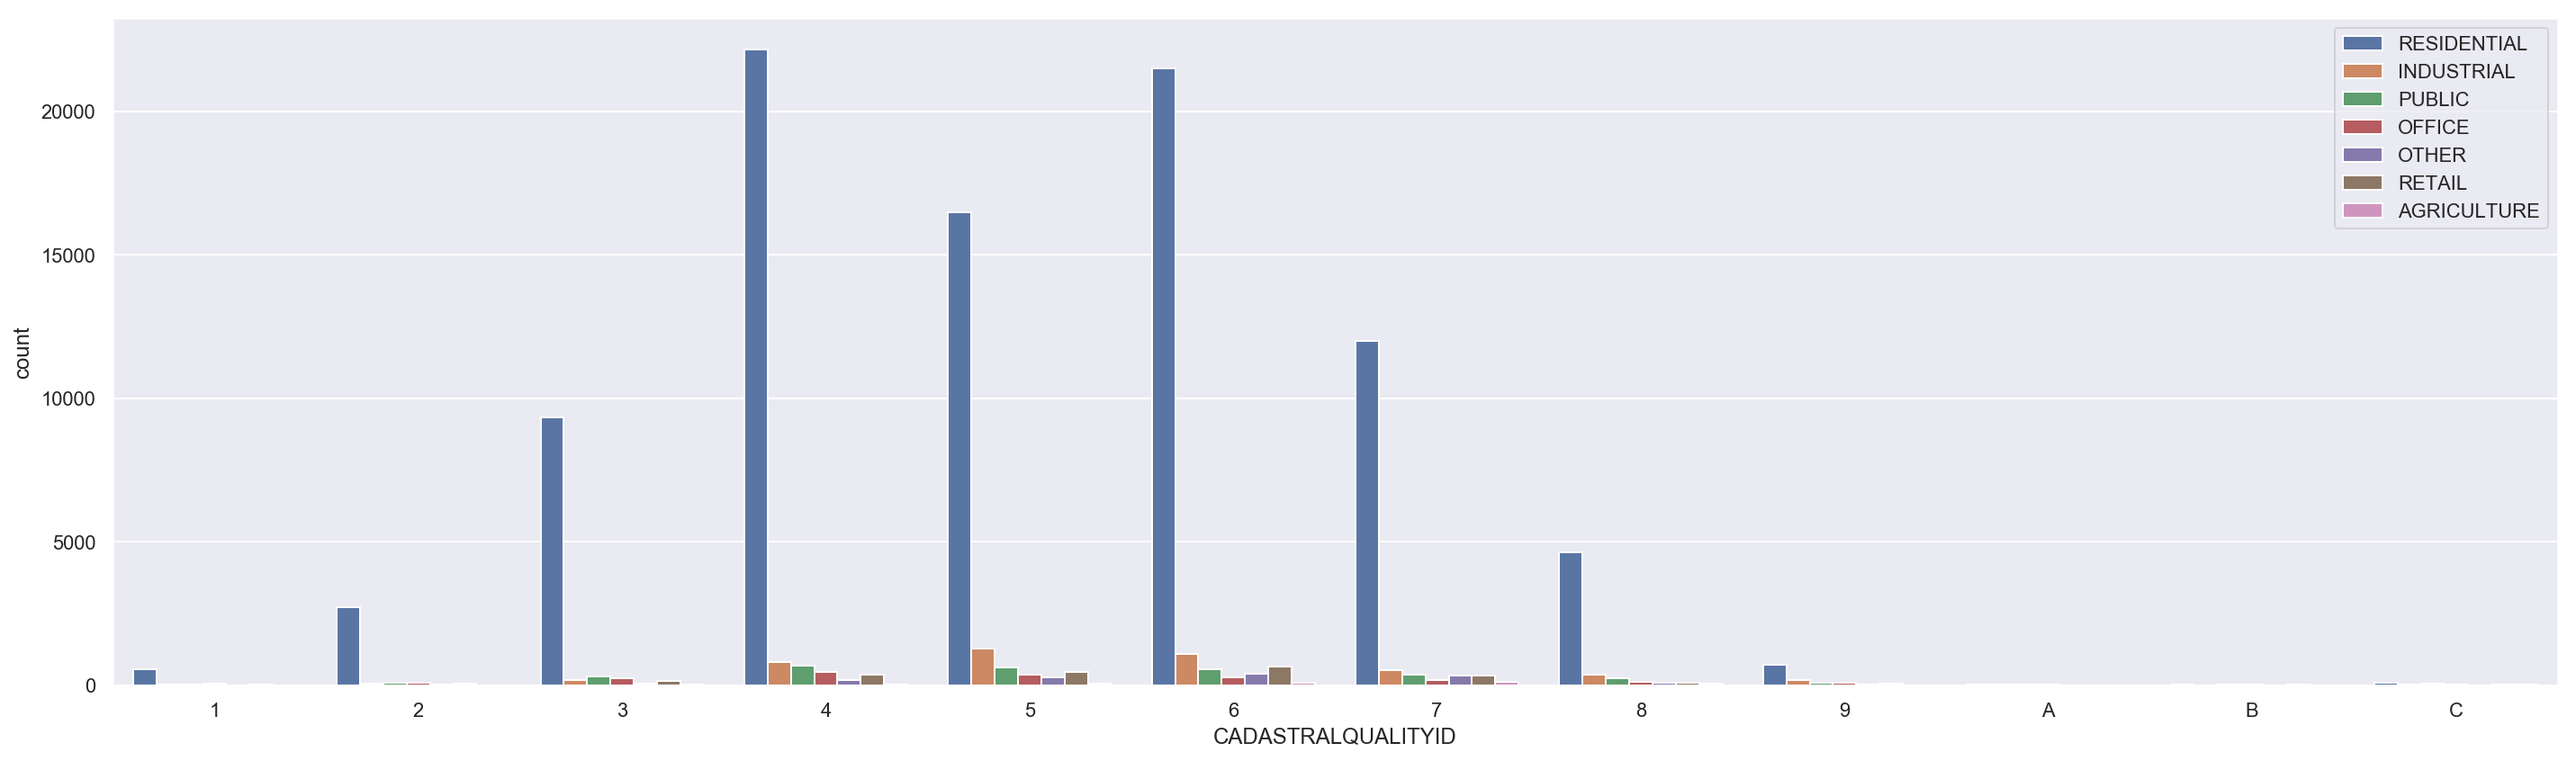

In [91]:
plt.figure(figsize=(20,6))
sns.countplot(x='CADASTRALQUALITYID', data=df_minsait, hue='CLASE', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C'])
plt.tight_layout()
plt.legend(loc=1);

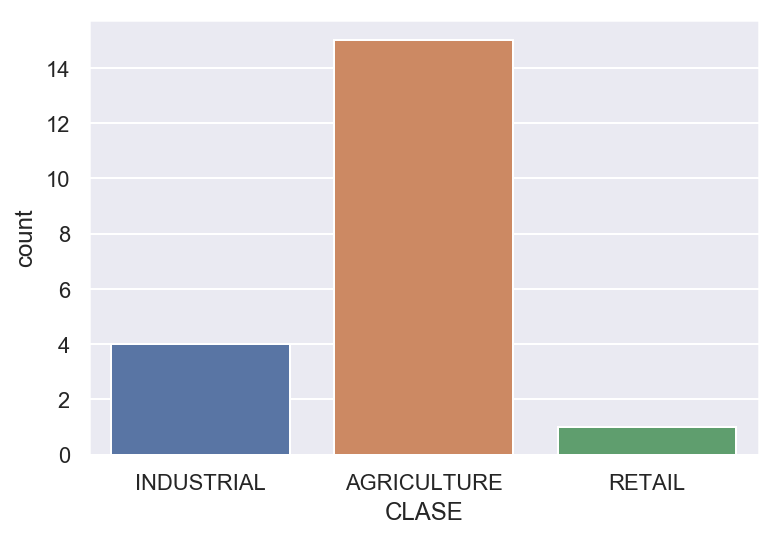

In [92]:
#Información relativa al valor perdido con respecto a la variable CADASTRALQUALITYID
sns.countplot(x='CLASE', data=df_minsait[df_minsait.CADASTRALQUALITYID.isna()]);

A priori parece que las clases coinciden cuando los valores son perdidos para las variables CADASTRALQUALITYID y MAXBUILDINGFLOOR, por lo que pueden ser representativa esta información

Vamos a calcular el mapa de calor en función de la matriz de correlación entre las variables a utilizar para resolver este problema

In [93]:
#plt.figure(figsize=(40,40))
#sns.heatmap(df_minsait.corr(), annot=True)
#plt.title("Correlation map")
#plt.show()

La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). Aún así vamos a intentar dibujar los puntos que tenemos en el conjunto de datos con respecto a la latitud y la longitud para hacernos una idea de las parcelas y de la clase que presentan

(2112423480.6497831, 2295627894.350217, 165025216.29966614, 166575087.7003339)

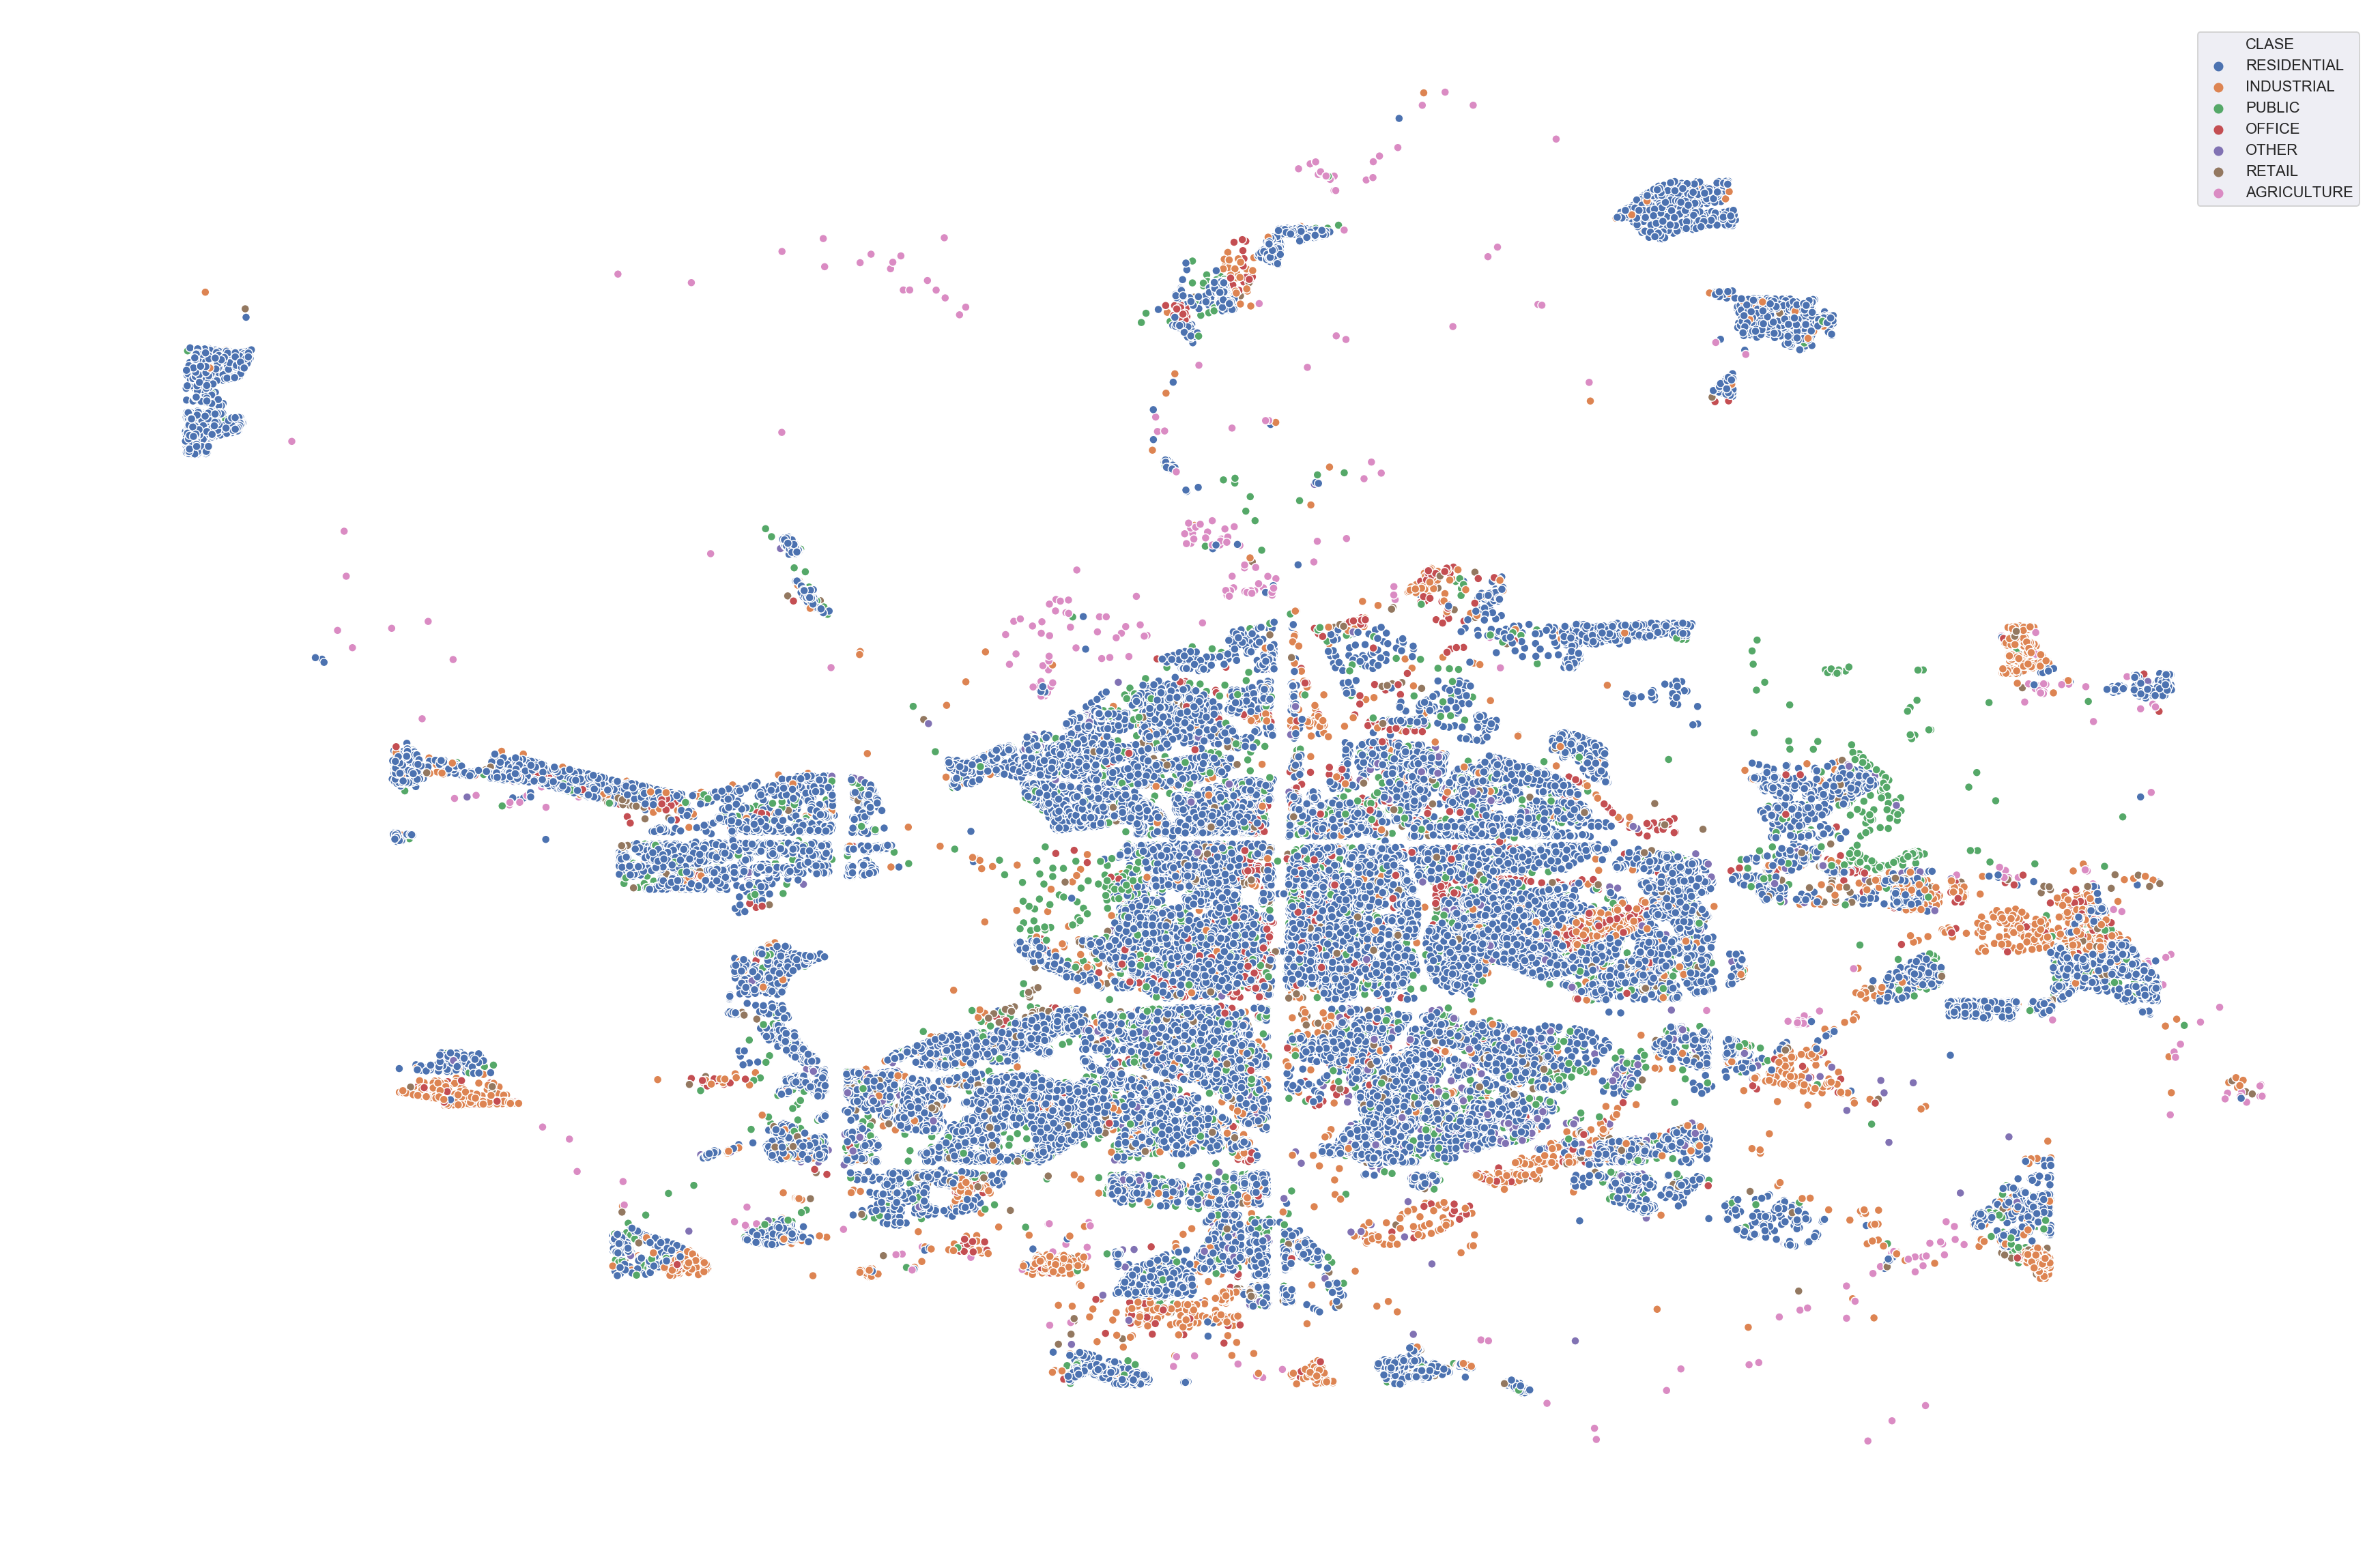

In [11]:
plt.figure(figsize=(30,20))
sns.scatterplot(x="X", y="Y", hue="CLASE",data=df_minsait)
plt.axis('off');

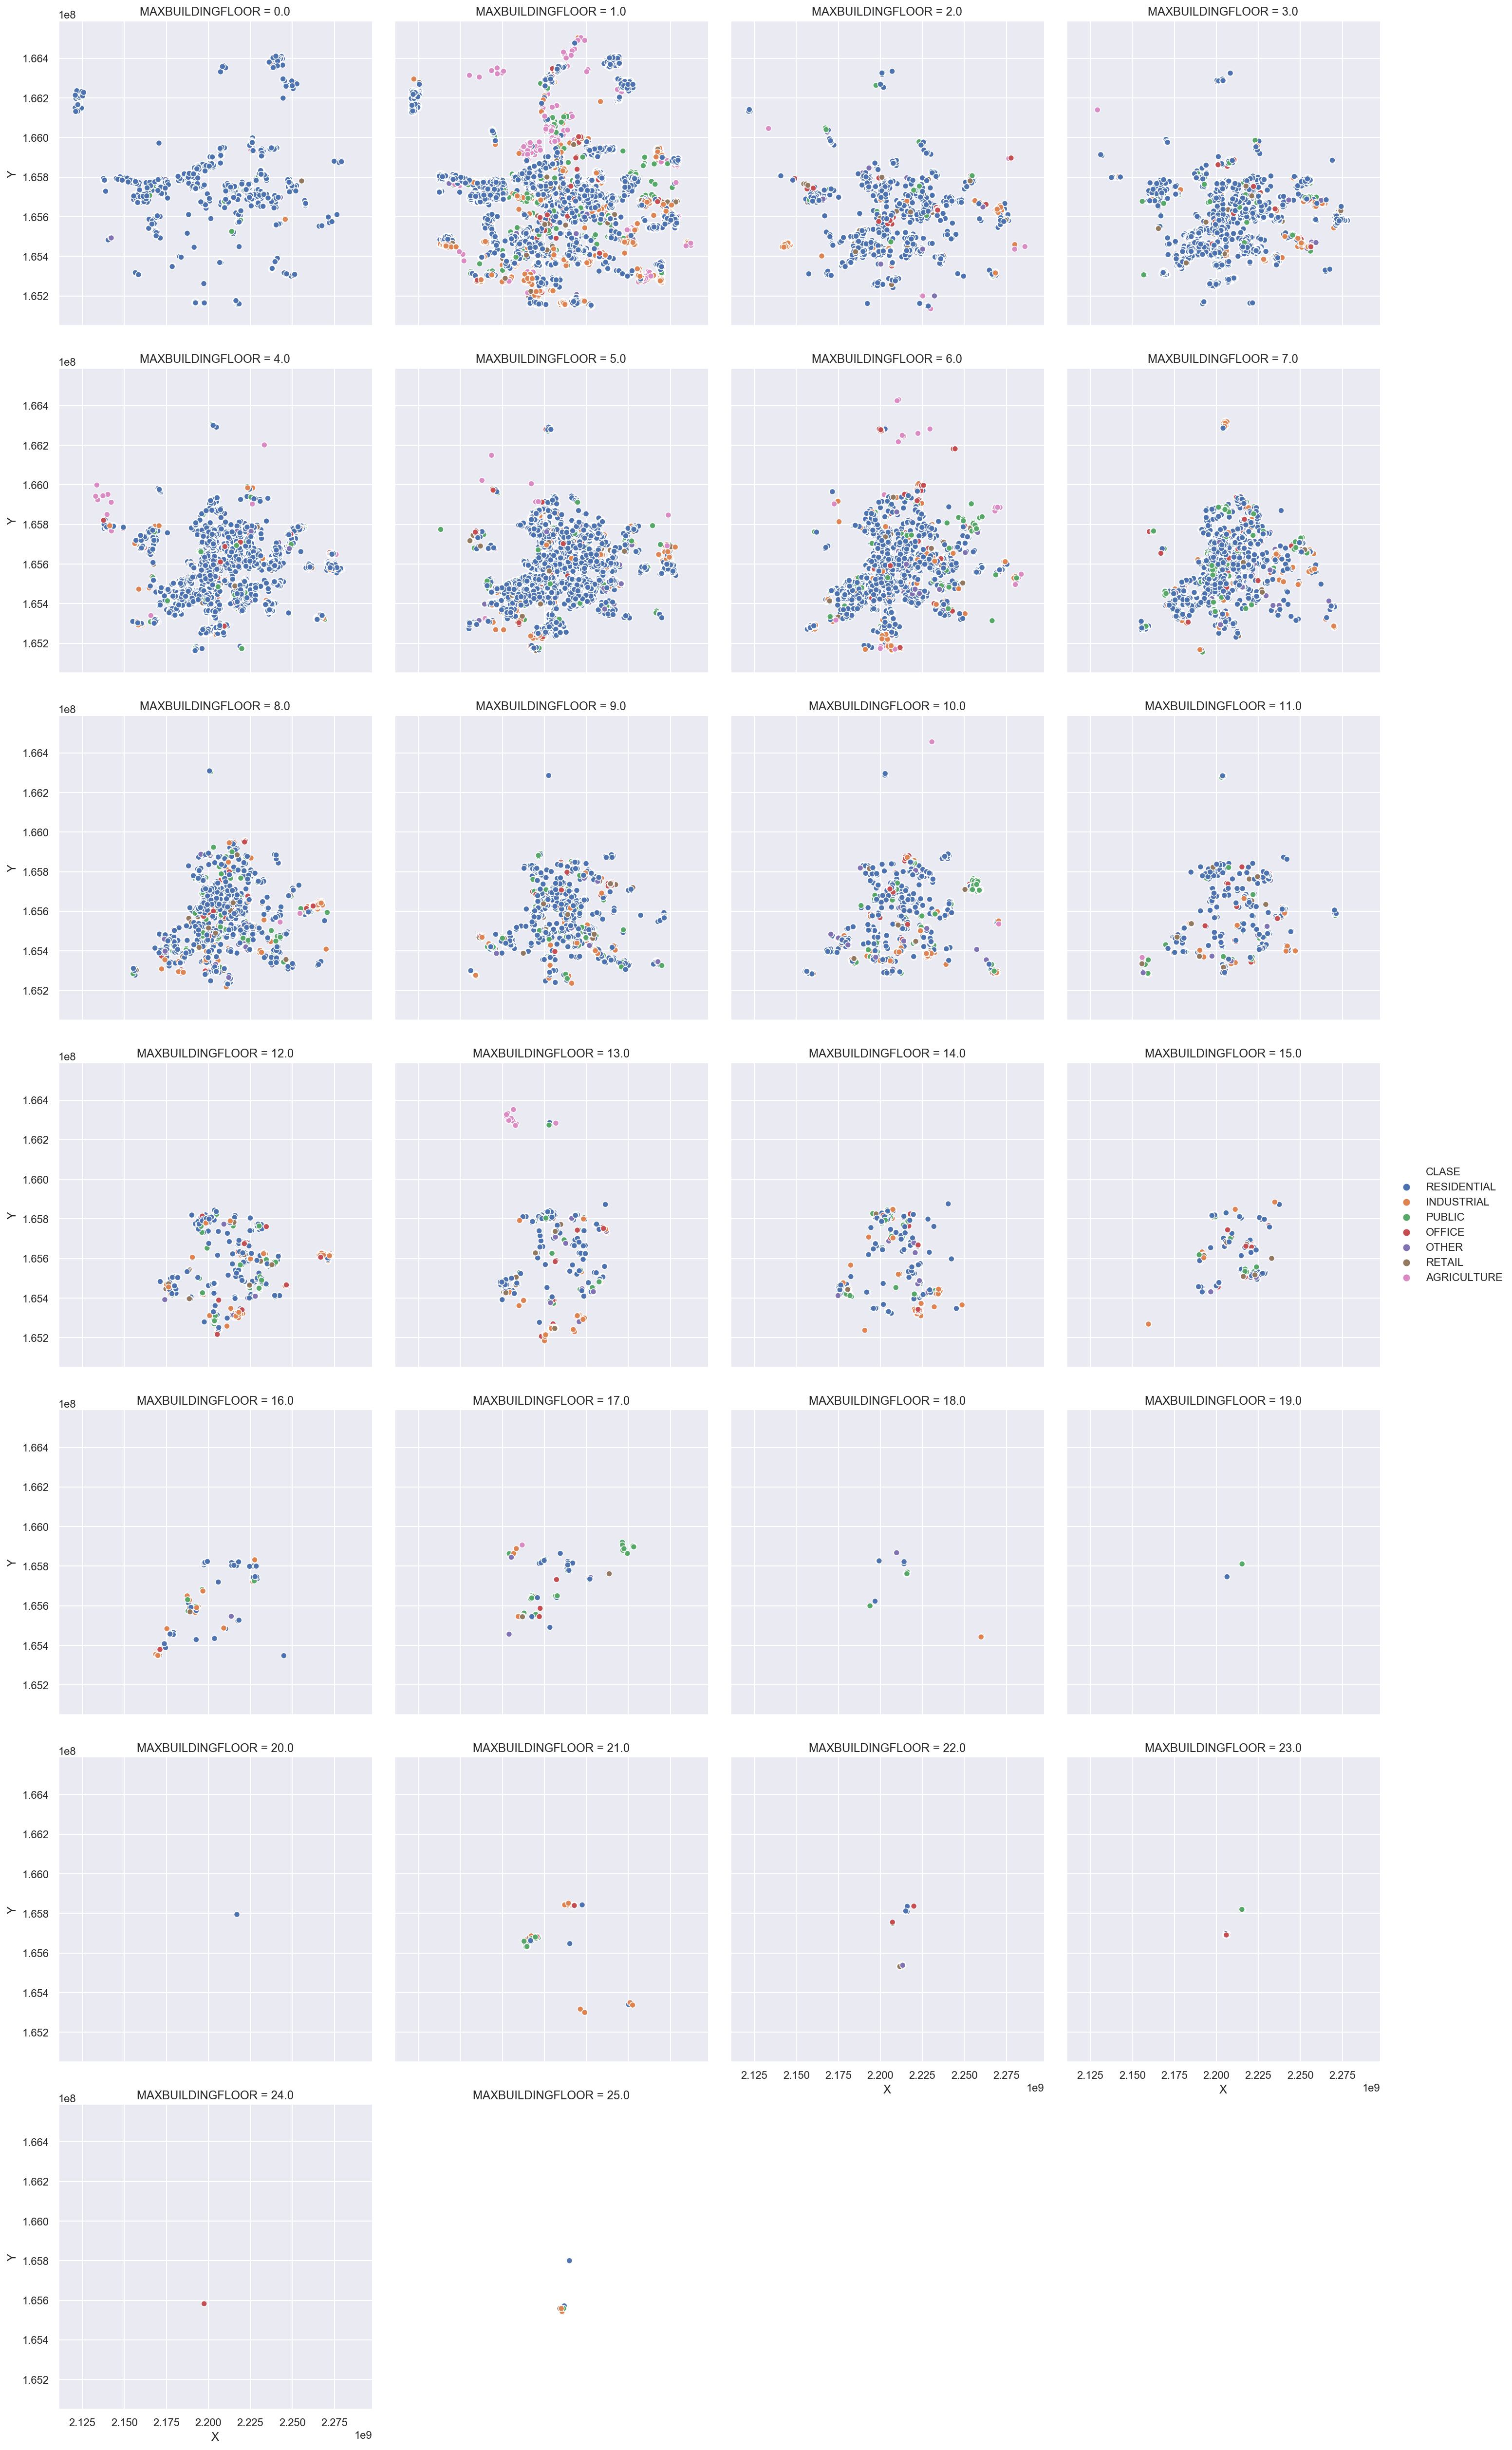

In [12]:
sns.relplot(x="X", y="Y", col="MAXBUILDINGFLOOR", hue="CLASE", kind="scatter", col_wrap=4, data=df_minsait)

Aquellos registros que presentan el atributo **MaxBuildingFloor** como nan

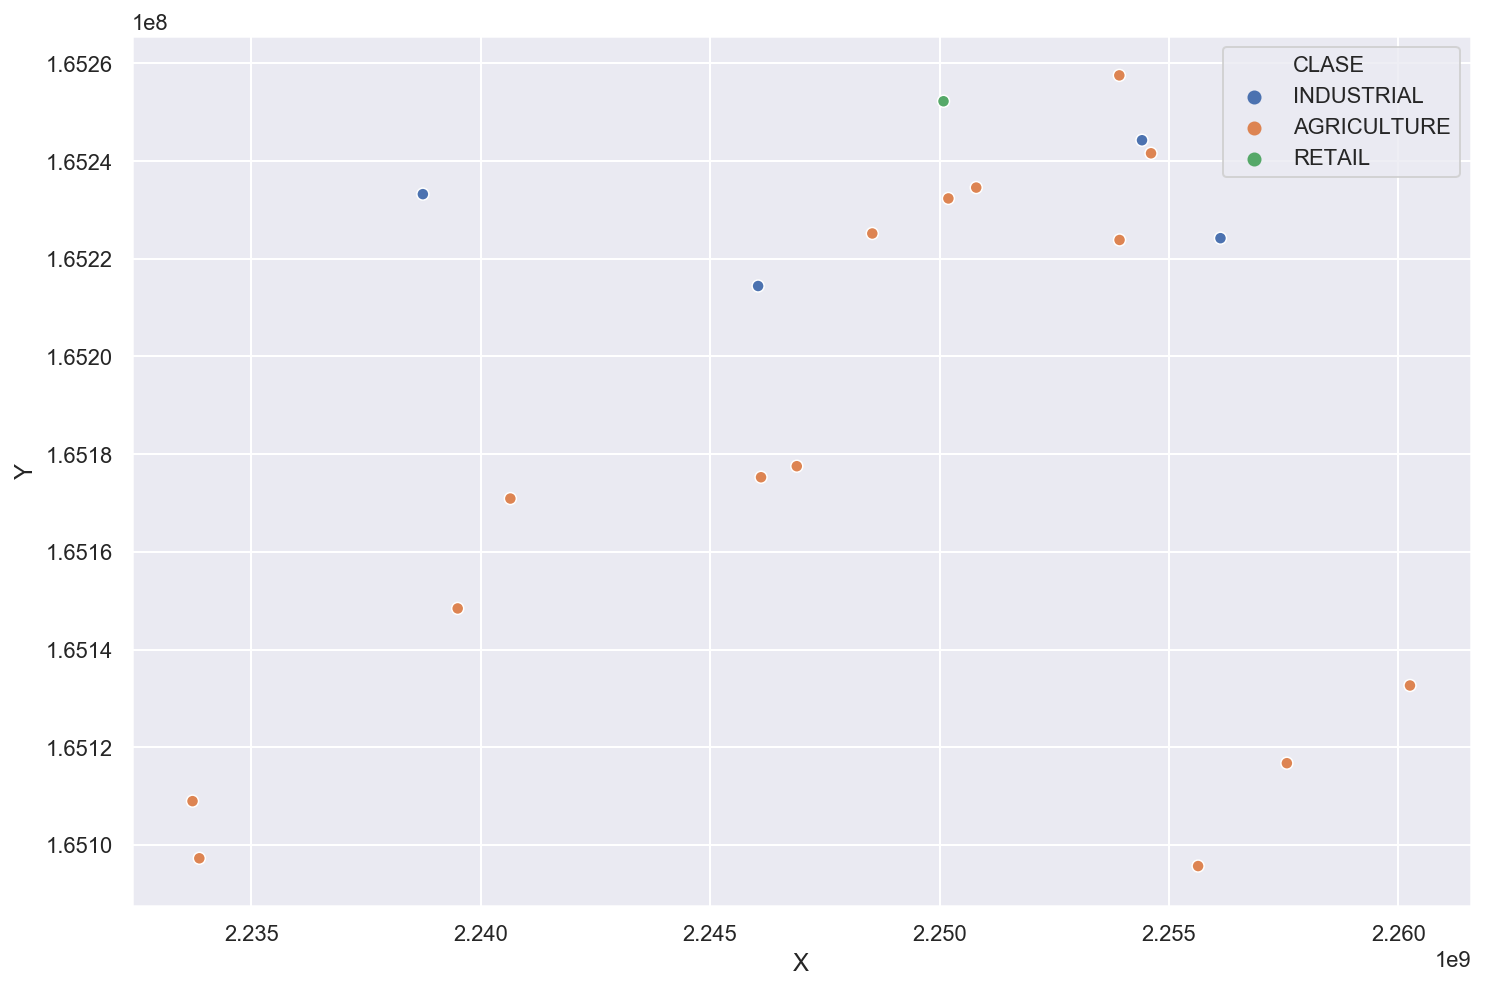

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="X", y="Y", hue="CLASE",data=df_minsait[df_minsait['MAXBUILDINGFLOOR'].isna()])

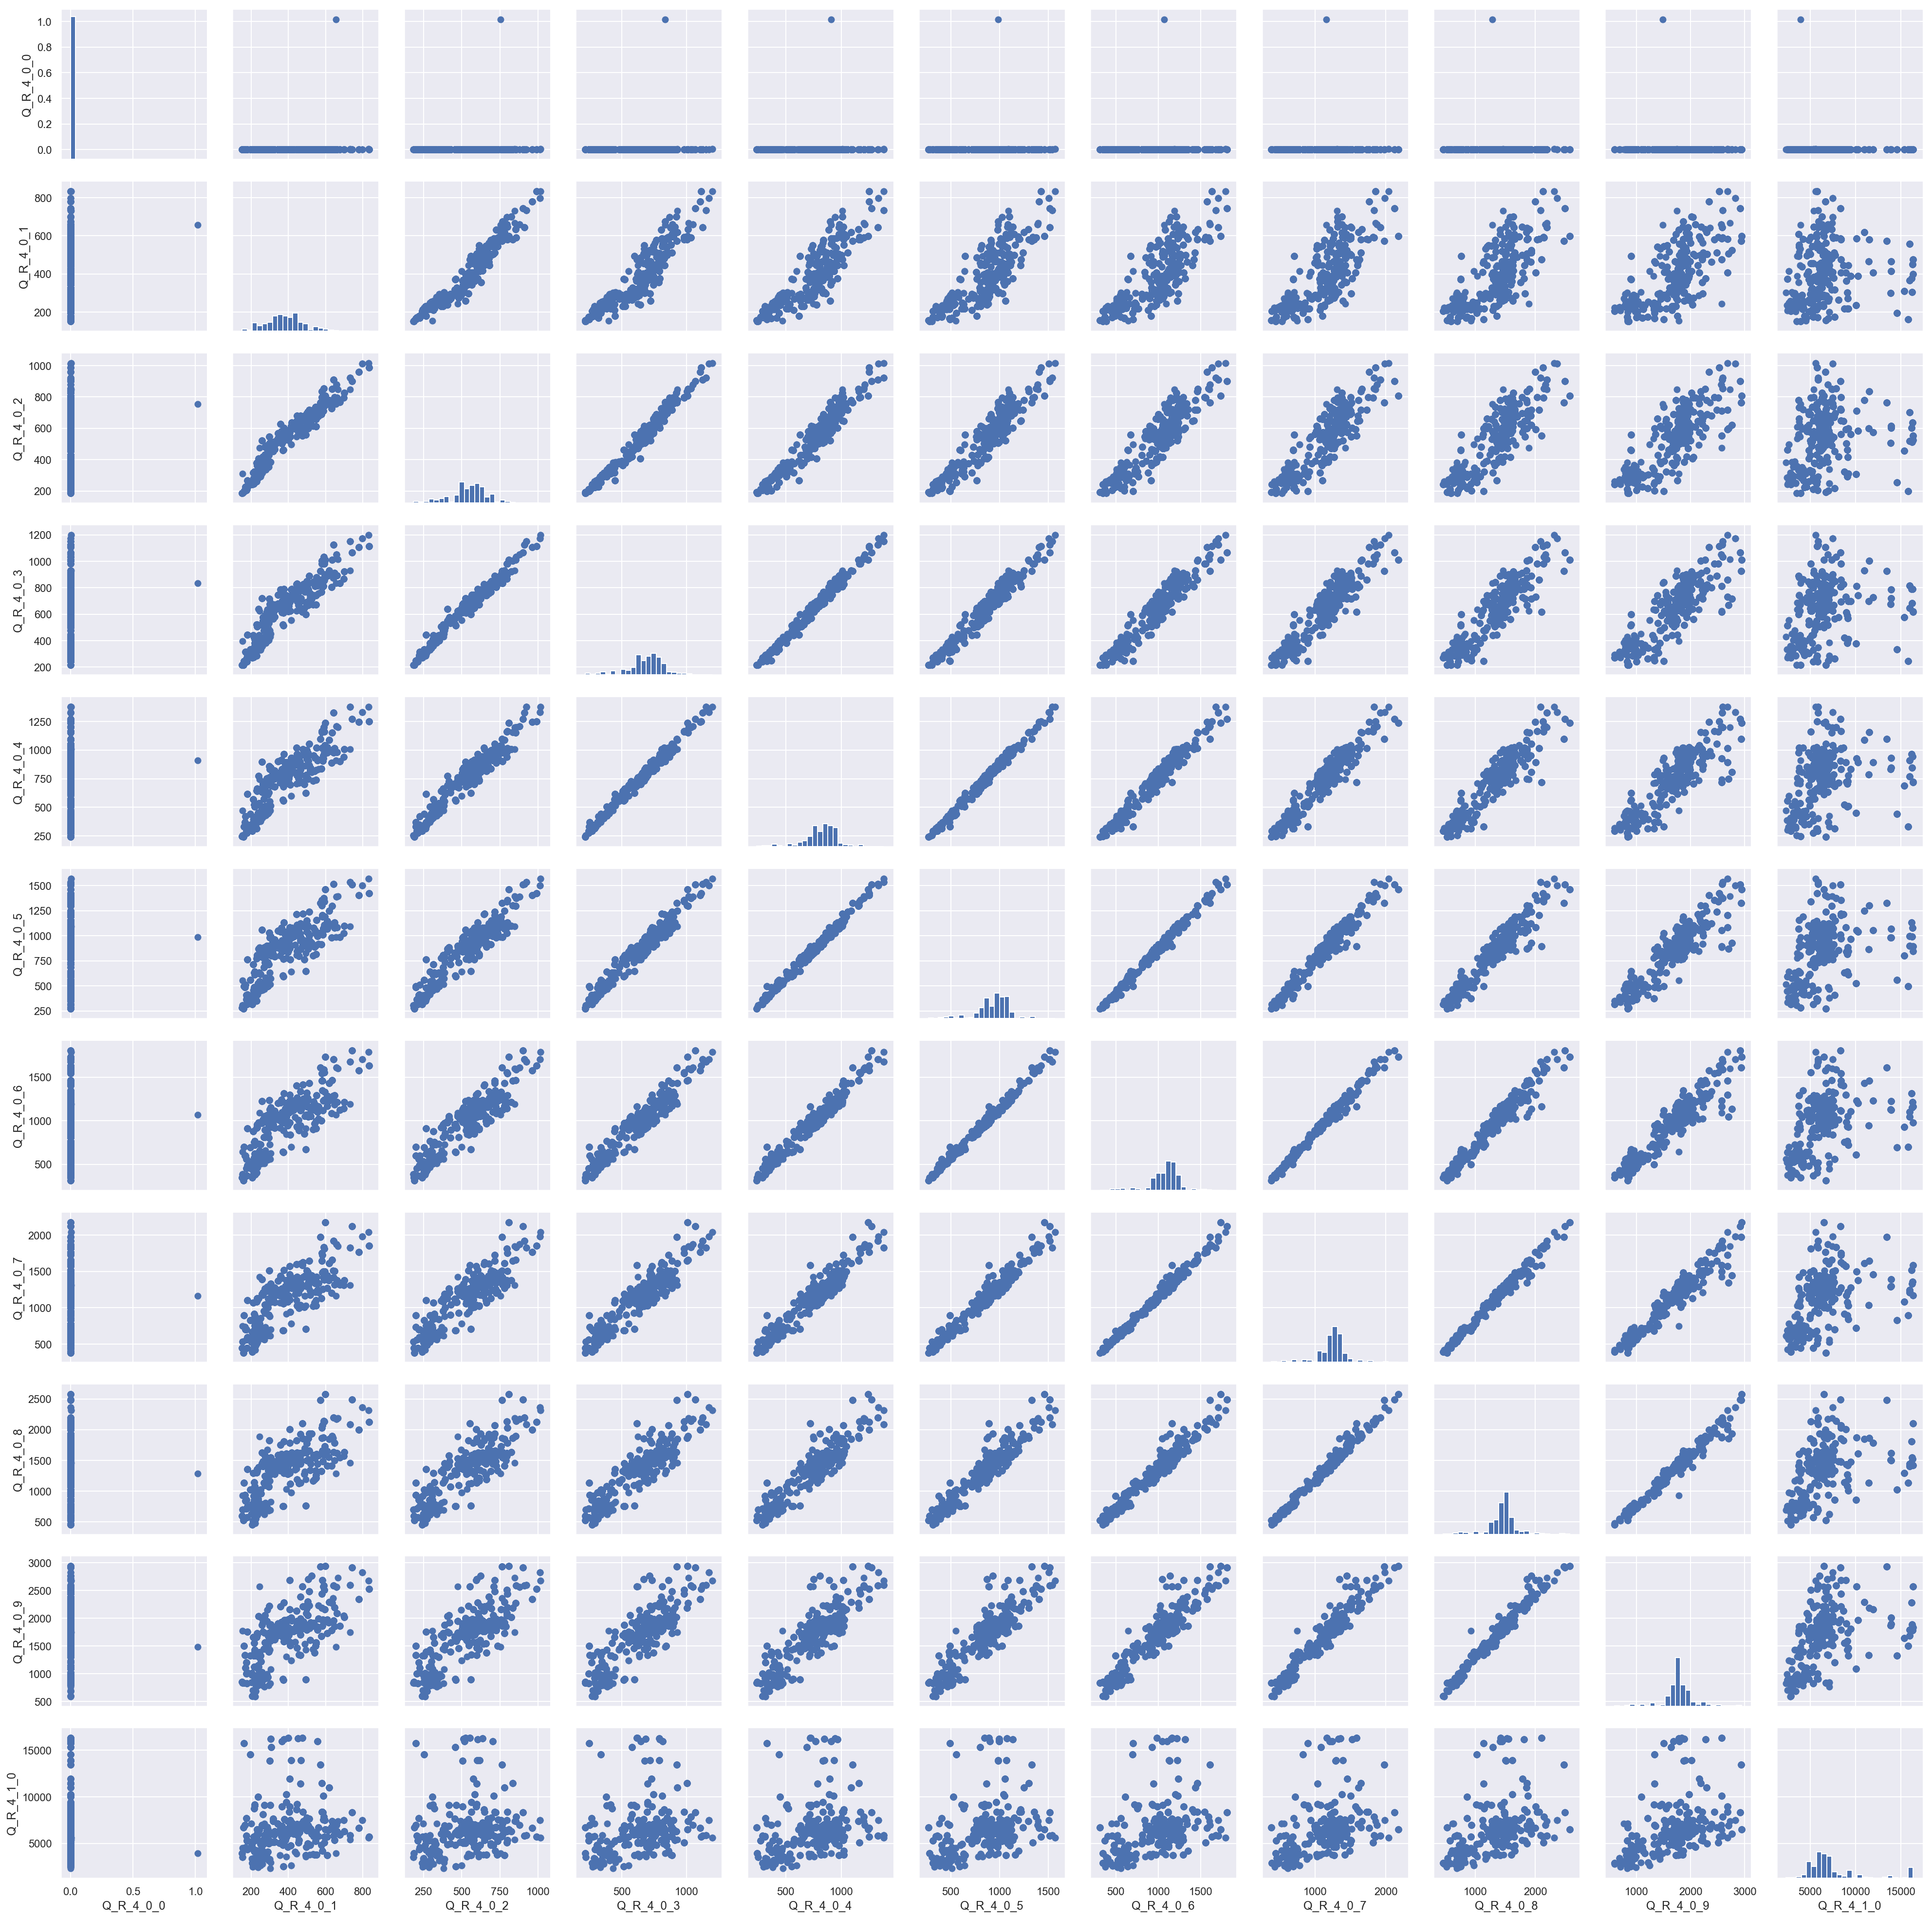

In [24]:
features = df_minsait.columns[2:13]
# Dibujamos la gráfica correspondiente
g = sns.PairGrid(df_minsait[features])
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins=25)

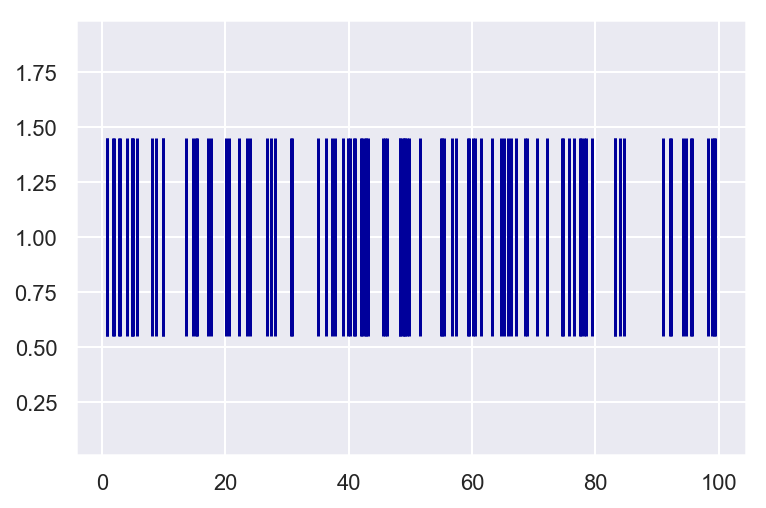

In [54]:
spikes = 100*np.random.random(100)
plt.eventplot(spikes, orientation='horizontal', linelengths=0.9, color=[(df_minsait.iloc[0]['Q_R_4_0_0'], df_minsait.iloc[0]['Q_G_3_0_0'], df_minsait.iloc[0]['Q_B_2_0_0']/255)])
#plt.eventplot(spikes, color=[(df_minsait.iloc[0]['Q_R_4_0_0'], df_minsait.iloc[0]['Q_G_3_0_0'], df_minsait.iloc[0]['Q_B_2_0_0'])])
plt.show()

https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/radiometric

https://sentinel.esa.int/web/sentinel/missions/sentinel-2/instrument-payload/resolution-and-swath



## Colores

<img src="data/sentinel_resolution.jpg">

In [179]:
colors = np.array([[df_minsait.iloc[i]['Q_R_4_0_0'], df_minsait.iloc[i]['Q_G_3_0_0'], df_minsait.iloc[i]['Q_B_2_0_0'], df_minsait.iloc[i]['Q_NIR_8_0_0']]
                   for i in range(20)])

In [180]:
colors

array([[0.00000000e+00, 1.28335745e-10, 1.55003632e+02, 1.34288975e-05],
       [5.87961113e-05, 1.35251810e-11, 1.20000275e+02, 2.96746421e-05],
       [0.00000000e+00, 0.00000000e+00, 8.30003891e+01, 5.15822921e-06],
       [0.00000000e+00, 6.34158505e-06, 1.44985353e-03, 2.28463486e-03],
       [0.00000000e+00, 0.00000000e+00, 1.93000626e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.14000305e+02, 0.00000000e+00],
       [0.00000000e+00, 1.36791714e-05, 2.80004463e+01, 0.00000000e+00],
       [1.30831637e-10, 5.39968070e-11, 2.13000015e+02, 8.30155944e-11],
       [3.99791679e-05, 8.02515387e-06, 1.04001289e+02, 2.88972398e-04],
       [1.09888730e-03, 9.08119091e-06, 2.80006943e+01, 7.61947548e-03],
       [2.75163971e-11, 2.99448197e-06, 1.79000473e+02, 2.17086332e-11],
       [0.00000000e+00, 0.00000000e+00, 8.30003891e+01, 5.15822921e-06],
       [0.00000000e+00, 0.00000000e+00, 7.50008621e+01, 5.84013969e-06],
       [0.00000000e+00, 0.00000000e+00, 9.90006714e

In [183]:
sns.scatterplot(x="X", y="Y", data=df_minsait[:20], 
                c=colors/255)

In [32]:
df_minsait.iloc[0][df_minsait.columns[2:13]]

Q_R_4_0_0          0
Q_R_4_0_1    443.001
Q_R_4_0_2    616.002
Q_R_4_0_3    746.998
Q_R_4_0_4    872.996
Q_R_4_0_5       1009
Q_R_4_0_6       1159
Q_R_4_0_7       1342
Q_R_4_0_8       1572
Q_R_4_0_9    1943.69
Q_R_4_1_0    6512.79
Name: 35984B9C3E7CD9A1, dtype: object

In [67]:
list_colors = [df_minsait.columns[2:13], df_minsait.columns[13:24], df_minsait.columns[24:35], df_minsait.columns[35:46]]
colors = [ 'red', 'green', 'blue', 'gray']

Registro: 0


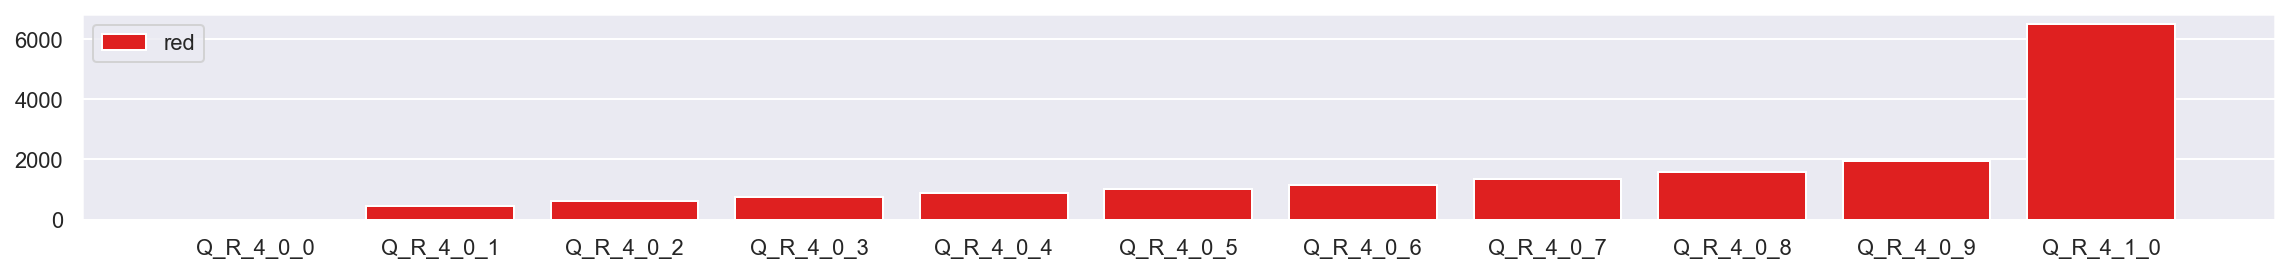

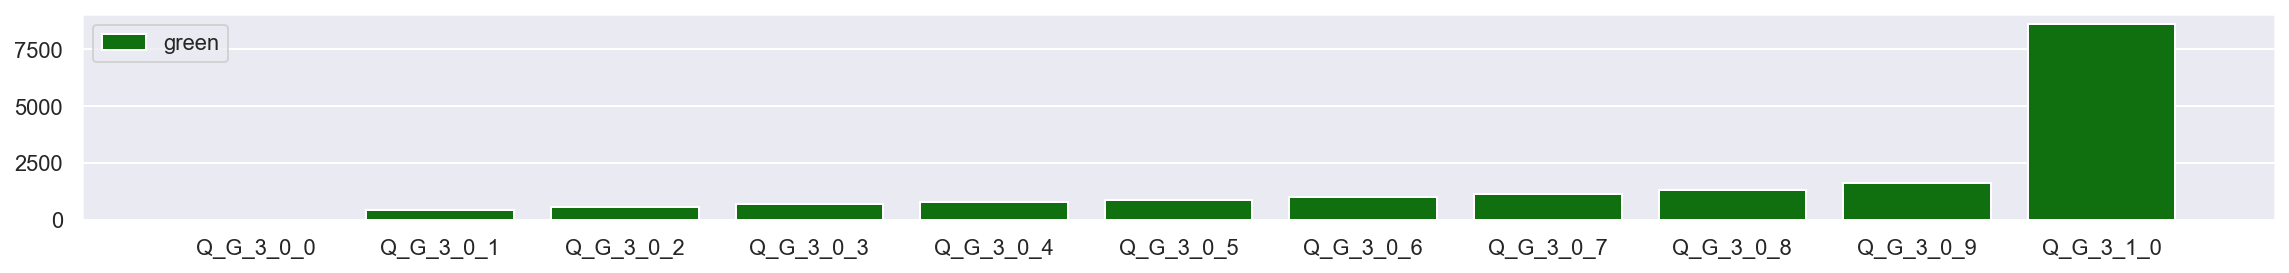

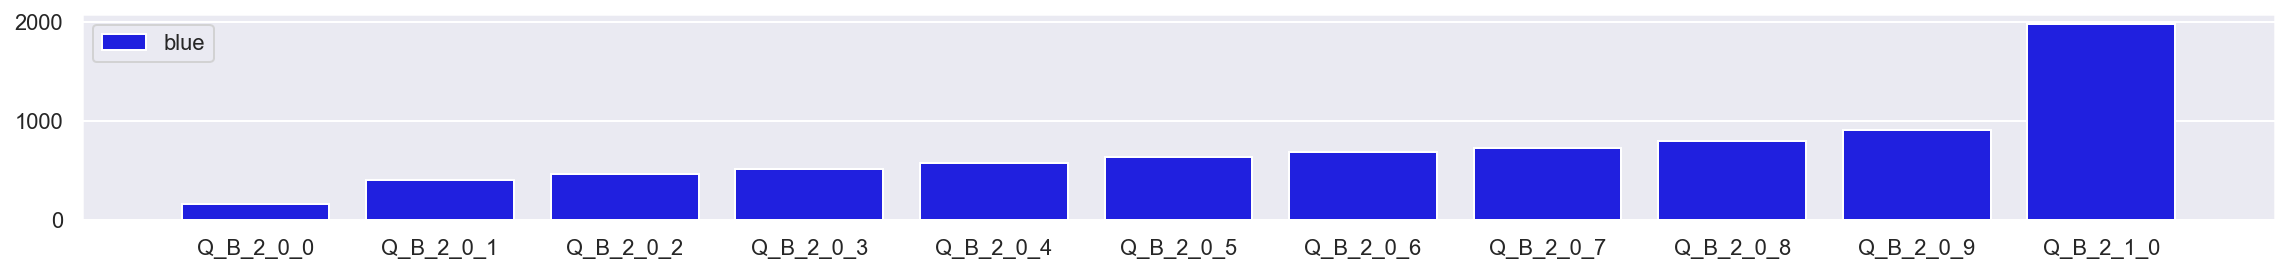

In [84]:
for i in range(1):
    print('Registro: '+str(i))
    for idx, val in enumerate(list_colors):
        plt.figure(idx, figsize=(16,2))
        sns.barplot(x=df_minsait.iloc[i][val].index, y=df_minsait.iloc[i][val].values, color=colors[idx], label=colors[idx])
        plt.legend()
        plt.plot()
        plt.tight_layout()

In [108]:
sns.distplot(df_minsait[df_minsait.CLASE=='RESIDENTIAL']['Q_R_4_0_0'], label='RESIDENTIAL')
plt.title('Histograma para el valor Q_R_4_0_0 para la clase RESIDENCIAL de todas las filas con clase residencial')
plt.legend()

## AREA y GEOM

Vamos a calcular el área con las variables GEOM que presenta el dataset para ver si concuerda con el área dada. **NO CREO QUE TENGAN RELEVANCIA**

In [117]:
df_minsait.iloc[0][df_minsait.columns[-9:-4]]

AREA         144.427
GEOM_R1     0.557237
GEOM_R2    0.0672495
GEOM_R3    0.0573723
GEOM_R4     0.853127
Name: 35984B9C3E7CD9A1, dtype: object

---
## Cargar datos a predecir

In [25]:
df_minsait_test = pd.read_csv('data/Estimar_UH2020.txt', sep="|", index_col='ID', encoding='utf-8')

In [26]:
df_minsait_test.head()

X          Y  Q_R_4_0_0   Q_R_4_0_1   Q_R_4_0_2  \
ID                                                                           
44198C2A811A4DF4  2200905624  165480229   0.000001  445.999637  634.001172   
216F638609E0E39E  2207436564  165625751   0.000000  385.000995  580.005762   
FFFCEFB11E257364  2200313961  165752898   0.000000  343.996613  567.010620   
596C5C8CE10BCF    2199220382  166288192   0.000000  173.999956  218.000000   
F931B9FA2A8641D1  2209143550  165253334   0.000007  588.002014  738.999451   

                   Q_R_4_0_3   Q_R_4_0_4    Q_R_4_0_5    Q_R_4_0_6  \
ID                                                                   
44198C2A811A4DF4  780.000568  902.004053  1025.997009  1157.997681   
216F638609E0E39E  737.004449  873.996460  1005.998779  1141.001758   
FFFCEFB11E257364  745.995483  900.997925  1051.995361  1200.006226   
596C5C8CE10BCF    261.999713  315.999951   408.000565   560.000500   
F931B9FA2A8641D1  848.001282  954.000244  1074.000183  1228.998291   

                    Q_R_4_0_7  ...  Q_NIR_8_0_9  Q_NIR_8_1_0         AREA  \
ID                             ...                                          
44198C2A811A4DF4  1304.999585  ...  2545.997754  6803.875107   283.593030   
216F638609E0E39E  1296.997083  ...  2220.990137  5544.670485   357.712450   
FFFCEFB11E257364  1370.990234  ...  2421.002441  8827.104856   160.979017   
596C5C8CE10BCF     700.697351  ...  2752.005786  7734.759269  9088.678448   
F931B9FA2A8641D1  1416.999817  ...  2712.997681  7435.991490   994.424368   

                   GEOM_R1   GEOM_R2   GEOM_R3   GEOM_R4  CONTRUCTIONYEAR  \
ID                                                                          
44198C2A811A4DF4  0.046741  0.014588  0.011298  0.774503             1994   
216F638609E0E39E  0.378483  0.041085  0.025753  0.626835             1968   
FFFCEFB11E257364  0.306545  0.034637  0.054977  1.587207             1968   
596C5C8CE10BCF    0.338955  0.006846  0.005448  0.795725             1993   
F931B9FA2A8641D1  0.581476  0.036470  0.016033  0.439638             1964   

                  MAXBUILDINGFLOOR  CADASTRALQUALITYID  
ID                                                      
44198C2A811A4DF4               5.0                   4  
216F638609E0E39E               8.0                   3  
FFFCEFB11E257364               5.0                   7  
596C5C8CE10BCF                 6.0                   6  
F931B9FA2A8641D1               4.0                   7  

[5 rows x 54 columns]

In [27]:
df_minsait_test.shape

(5618, 54)